# Grafo del experimtento.
Primero, importamos las librerías

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

Leemos la tabla de datos

In [2]:
# Use pandas to read the data from the csv file.
df = pd.read_csv('nodos.csv')

# Create a dictionary with the data from the csv file.
data = {'key': df['key'],'x': df['x'], 'y': df['y'],'cantidad':df['cantidad'],'mineral':df['Mineral']}

# Create a dataframe from the dictionary.
df = pd.DataFrame(data)

# Create a list of the x and y coordinates.
x = df['x'].tolist()
y = df['y'].tolist()
keys = df['key'].tolist()
cantidad = df['cantidad'].tolist()
mineral = df['mineral'].tolist()


Imprimimos la tabla de datos

In [3]:
df

,key,x,y,cantidad,mineral
0,A,9083,6551,2,Au
1,B,9008,6504,2,Au
2,C,8950,6477,2,Au
3,D,8910,6415,2,Au
4,E,8881,6404,2,Au
5,F,8833,6407,3,Au
6,G,9123,6314,3,Fe
7,H,9162,6310,2,Fe
8,I,9084,6246,3,Fe
9,J,9146,6231,2,Fe


Creamos un nuevo grafo, y le asignamos las aristas

In [4]:
letters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
G = nx.path_graph(0)
for (i, j, a) in zip(x, y, letters):
    for (k, l, b) in zip(x, y, letters):
        if i != k:
            G.add_edge(a, b, weight=math.sqrt((i - k) ** 2 + (j - l) ** 2))
nodes = {letters[i]: (x[i], y[i]) for i in range(len(x))}

Dibujamos el grafo

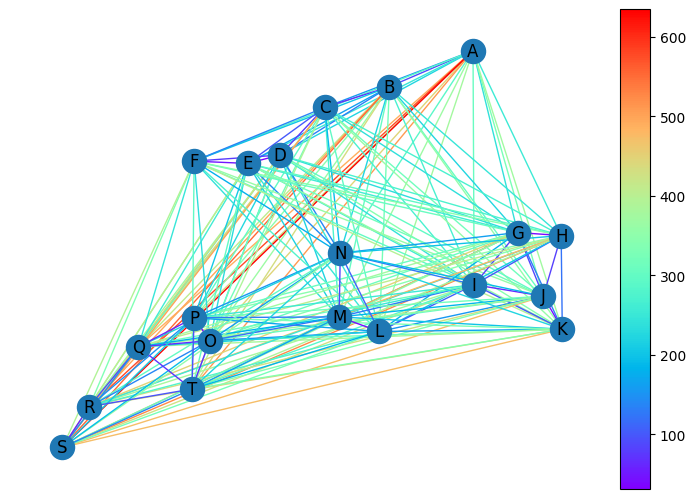

In [5]:
#Creamos el grafo
nx.draw(G, nodes, edge_color=[G[u][v]['weight'] for (u, v) in G.edges()],
        edge_cmap=plt.cm.rainbow, with_labels=True)

# Creamos la barra de color
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
pesosw = list([G[u][v]['weight'] for (u, v) in G.edges()])
norm = mpl.colors.Normalize(vmin=min(pesosw), vmax=max(pesosw))
cb1 = mpl.colorbar.ColorbarBase(ax=ax_cb,cmap=plt.cm.rainbow,norm=norm,orientation='vertical')
plt.gcf().add_axes(ax_cb)

#Mostramos la imagen
plt.show()

In [6]:
print("El arbol completo tiene " + str(len(G.edges)) + " aristas\n")


El arbol completo tiene 189 aristas



Copiamos el grafo a otro, y le reducimos el número de aristas, a las aristas con un peso inferior a 200

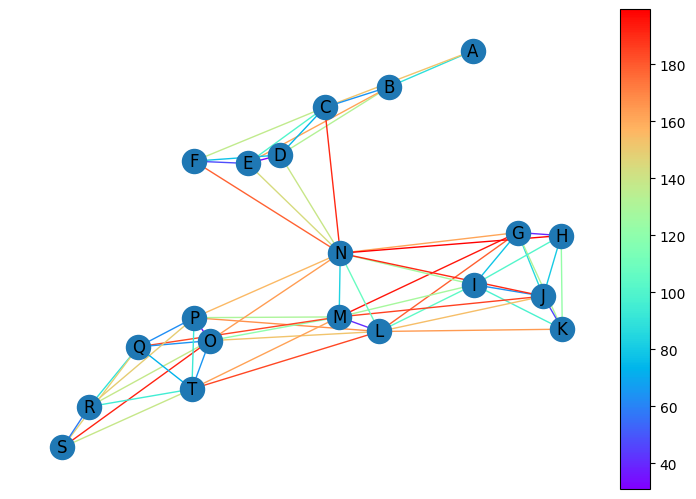

In [7]:

G2 = G.copy()
max_weight = 200
G2.remove_edges_from([(u, v) for (u, v, d) in G2.edges(data=True) if d['weight'] > max_weight])


# Dibujamos el grafo
nx.draw(G2, nodes, edge_color=[G2[u][v]['weight'] for (u, v) in G2.edges()],
        edge_cmap=plt.cm.rainbow, with_labels=True)

# Creamos la barra de color
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
pesosw = list([G2[u][v]['weight'] for (u, v) in G2.edges()])
norm = mpl.colors.Normalize(vmin=min(pesosw), vmax=max(pesosw))
cb1 = mpl.colorbar.ColorbarBase(ax=ax_cb,cmap=plt.cm.rainbow,norm=norm,orientation='vertical')
plt.gcf().add_axes(ax_cb)

#Mostramos imagen
plt.show()

Por lo tanto, podemos calcular en número de aritas:

In [8]:
print("El arbol reducido tiene " + str(len(G2.edges)) + " aristas\n")

El arbol reducido tiene 62 aristas



Podemos calcular el árbol mínimo de dispersión

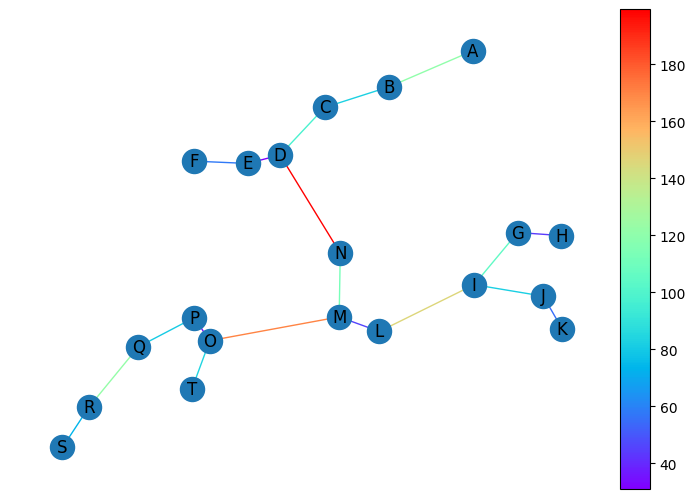

In [9]:
# Create a new graph of the minimum spanning tree of the original graph.
MST = nx.minimum_spanning_tree(G)
# Plot the graph.
nx.draw(MST, nodes, edge_color=[MST[u][v]['weight'] for (u, v) in MST.edges()], edge_cmap=plt.cm.rainbow, with_labels=True)

# Creamos la barra de color
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
pesosw = list([G2[u][v]['weight'] for (u, v) in G2.edges()])
norm = mpl.colors.Normalize(vmin=min(pesosw), vmax=max(pesosw))
cb1 = mpl.colorbar.ColorbarBase(ax=ax_cb,cmap=plt.cm.rainbow,norm=norm,orientation='vertical')
plt.gcf().add_axes(ax_cb)

# Mostramos imagen
plt.show()
